# Projet de Prédiction des AVC dans un Établissement de Santé

## Contexte
Un établissement de santé de premier plan a constaté une augmentation du nombre de patients diagnostiqués avec un AVC. Pour remédier à ce problème croissant, l'établissement a décidé de lancer un projet visant à prédire la probabilité qu'un patient soit victime d'un AVC en fonction de divers facteurs de santé.

## Objectif du Projet
L'objectif principal de ce projet est de créer un modèle prédictif capable de déterminer la probabilité qu'un patient soit victime d'un AVC en utilisant les antécédents médicaux et les informations démographiques des patients. Ce modèle aidera à identifier les patients à risque élevé et à proposer des mesures d'intervention et de prévention précoces.

De manière spécifique il s'agit de:

1. Explorer l’ensemble de données pour identifier les caractéristiques les plus importantes des patients et/ou les caractéristiques cliniques.
2. Construire un modèle de prédiction d’accident vasculaire cérébral bien validé pour une utilisation clinique.
3. Déployer le modèle pour améliorer la prise de décision clinique de l'organisation.

## Données Disponibles
L'établissement de santé a accès à une grande quantité de données sur les patients, incluant :
- Antécédents médicaux
- Informations démographiques

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data=pd.read_csv("D:/Perso/Detection_AVC/data/healthcare-dataset-stroke-data.csv")
data.head()

#data["smoking_status"]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## 1- Analyse Exploratoire des Données

#### 1-1 Analyse de Forme
-  **Variable cible** : stroke
-  **Nombre de ligne et de colonne**: 5110 et 11
-  **Type de variable**: qualitatives : 5 et quantitatives: 6
-  **Analyse des valeurs manquantes**: seule la variable 'Indice de masse corporelle (BMI) du patient' possede des valeurs manquantes (3.93%)



In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df=data.copy()
df=df.drop(columns="id",axis=0)
print(df.shape)

(5110, 11)


<Axes: ylabel='count'>

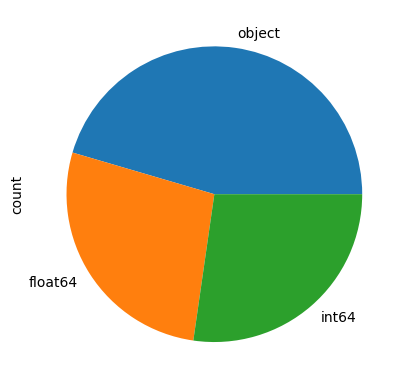

In [9]:
df.dtypes.value_counts().plot.pie()

In [10]:
#df["smoking_status"]=df["smoking_status"].replace('Unknown', np.nan)

<Axes: >

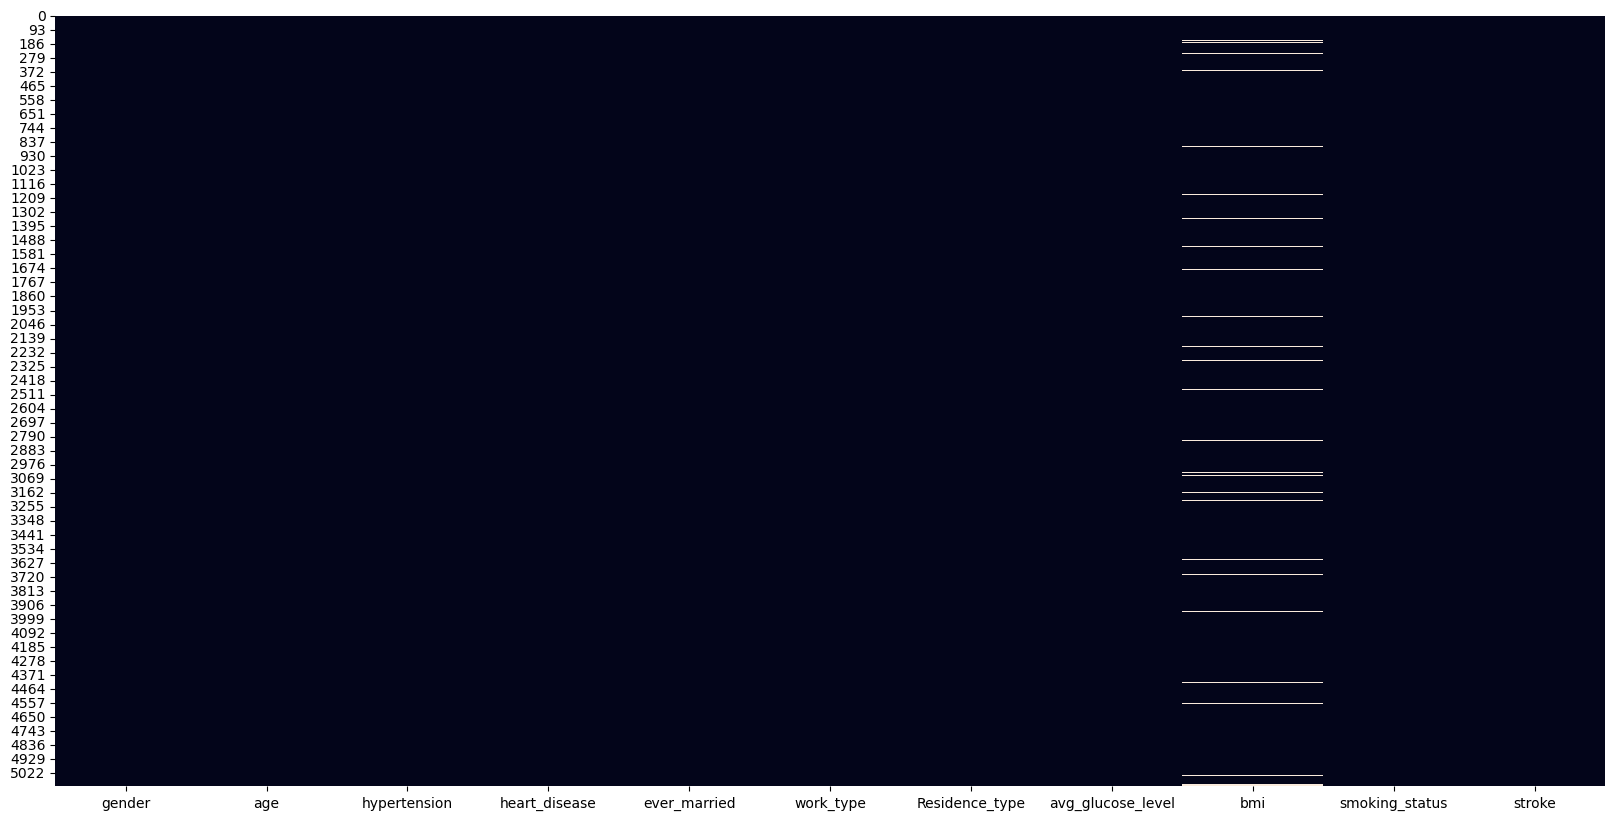

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

In [12]:
print(((df.isna().sum()/df.shape[0])*100).sort_values(ascending=True))

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
smoking_status       0.000000
stroke               0.000000
bmi                  3.933464
dtype: float64


In [13]:
#df=df.dropna()
print(df.shape)

(5110, 11)


<Axes: >

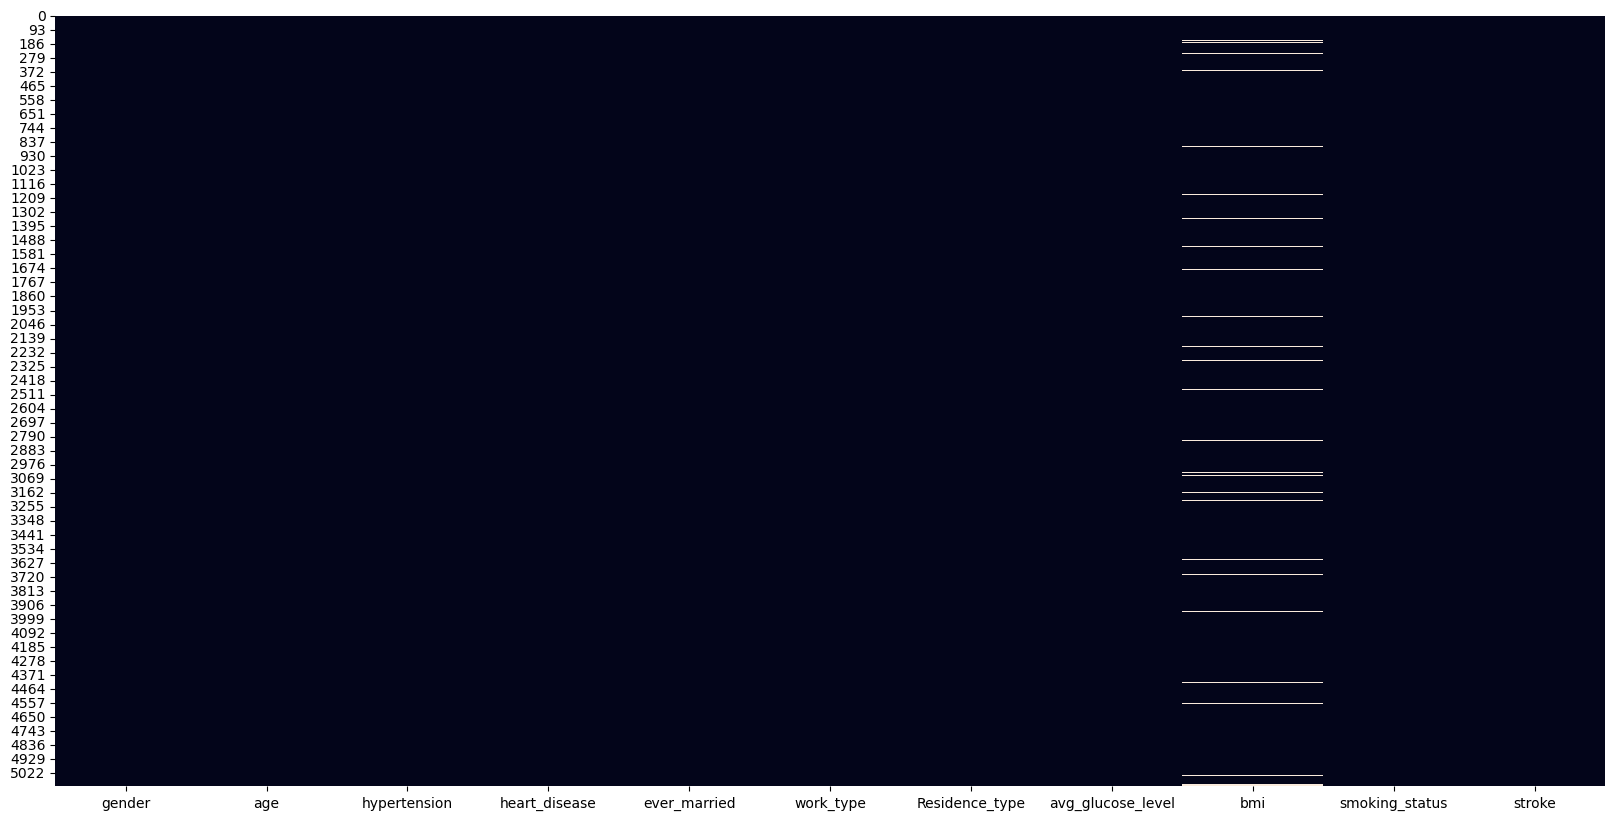

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

#### 1-2 Analyse du Fond

-  **Visualisation de la variable cible**:
    - Seulement 4.87% sont positifs à l'AVC


- **Signification des variables** :
  - Variables continues (float et int) :

    - **Âge (`age`)** : La distribution est bimodale, avec des pics autour de 50 ans (adultes d'âge moyen).
    - **Niveau moyen de glucose (`avg_glucose_level`)** : La distribution est asymétrique vers la droite avec un pic autour de 100 mg/dL et une autre petite bosse autour de 200 mg/dL, indiquant la présence possible de sous-groupes de patients avec des niveaux de glucose plus élevés, potentiellement liés au diabète.

    - **Indice de masse corporelle (`bmi`)** : La distribution est normale, mais tout petit peu asymétrique vers la droite, avec un pic autour de 25-30, correspondant à la gamme de surpoids, et une petite queue droite indiquant des IMC très élevés chez certains patients.

    - **Hypertension** :La majorité des patients n'ont pas d'hypertension, mais une minorité significative (près de 10%) est affectée par cette condition. Cela peut être un facteur de risque important à considérer dans la prédiction des AVC.

    - **Maladie cardiaque (`heart_disease`)** : Un pourcentage encore plus faible (5,40%) de patients est atteint de maladies cardiaques par rapport à l'hypertension, mais étant donné que les maladies cardiaques sont un facteur de risque majeur pour les AVC, cette minorité pourrait être très importante.

  - Variables continues (object) :

    - **Genre (`gender`)** : 58,6% des patients sont de sexe féminin.
   
    - **Statut matrimonial (`ever_married`)** : 65,6% des patients sont ou ont été mariés, tandis que 34,4% ne l'ont jamais été. Le mariage peut être lié à certains comportements ou conditions de santé, ce qui pourrait être pertinent pour la prédiction des AVC.

    - **Type de travail (`work_type`)** : La majorité des patients travaillent dans le secteur privé (57,2%), suivis par les travailleurs indépendants (16,0%), les enfants (13,4%), ceux travaillant pour le gouvernement (12,9%), et une petite proportion n'a jamais travaillé (0,4%). Cela montre que la majorité des patients sont actifs professionnellement, ce qui peut avoir un impact sur leur mode de vie et leur santé.

    - **Type de résidence (`Residence_type`)** : Les patients sont presque également répartis entre les zones urbaines (50,8%) et rurales (49,2%). 

    - **Statut de tabagisme (`smoking_status`)** : 37,0% des patients n'ont jamais fumé, 17,3% ont fumé par le passé, 15,4% fument actuellement, et 30,2% ont un statut de tabagisme inconnu. Le tabagisme est un facteur de risque important pour de nombreuses maladies, y compris les AVC. *Le grand pourcentage de statuts inconnus pourrait poser un défi pour l'analyse*.

- **Relation Variables / Target** :

#### Relation entre les variables liées aux mesures corporelles/sanguines et la variable cible(stroke)

1. **Tableau croisé d'`hypertension` par rapport à `stroke`** :
   - **Observations** :
     - Parmi les patients sans hypertension (hypertension = 0), 4429 n'ont pas eu d'AVC et 183 en ont eu.
     - Parmi les patients avec hypertension (hypertension = 1), 432 n'ont pas eu d'AVC et 66 en ont eu.
   - **Interprétation** :
     - Le taux d'AVC est plus élevé chez les patients hypertendus (environ 13,25%) comparé aux patients non hypertendus (environ 3,97%). Cela indique que l'hypertension est un facteur de risque significatif pour les AVC.

2. **Tableau croisé de `heart_disease` par rapport à `stroke`** :
   - **Observations** :
     - Parmi les patients sans maladie cardiaque (heart_disease = 0), 4632 n'ont pas eu d'AVC et 202 en ont eu.
     - Parmi les patients avec maladie cardiaque (heart_disease = 1), 229 n'ont pas eu d'AVC et 47 en ont eu.
   - **Interprétation** :
     - Le taux d'AVC est également plus élevé chez les patients ayant une maladie cardiaque (environ 17,03%) comparé à ceux sans maladie cardiaque (environ 4,18%). Cela renforce l'idée que les maladies cardiaques sont un facteur de risque important pour les AVC.

3. **Distribution de `avg_glucose_level` par statut d'AVC** :
   - **Observations** :
     - Les patients ayant subi un AVC (courbe bleue) présentent une distribution des niveaux de glucose plus étalée, avec une seconde bosse autour de 200 mg/dL, absente chez les patients n'ayant pas subi d'AVC.
     - Les patients sans AVC ont une distribution de glucose concentrée autour de 100 mg/dL.
   - **Interprétation** :
     - Un niveau de glucose élevé semble être associé à un risque accru d'AVC. Les patients ayant des niveaux de glucose très élevés (au-delà de 150 mg/dL) sont plus susceptibles d'avoir subi un AVC.

4. **Distribution de `bmi` par statut d'AVC** :
   - **Observations** :
     - Les distributions de l'IMC (Indice de Masse Corporelle) sont similaires pour les patients avec et sans AVC, mais la courbe pour les patients avec AVC est légèrement déplacée vers la droite, indiquant des IMC plus élevés.
   - **Interprétation** :
     - Bien que la différence ne soit pas aussi marquée que pour le glucose, les patients avec un IMC plus élevé semblent avoir un risque légèrement accru d'AVC.

#### Relation entre les variables démographiques et comportementales et la variable cible(stroke)

1. **Genre (`gender`)** :
   - **Observations** :
     - Parmi les patients sans AVC, 2853 (58,7%) sont des femmes et 2007 (41,2%) sont des hommes, avec un seul patient classé dans la catégorie "Other".
     - Parmi les patients ayant subi un AVC, 141 (56,6%) sont des femmes et 108 (43,4%) sont des hommes.
   - **Interprétation** :
     - Le taux d'AVC est similaire entre les femmes (4,7%) et les hommes (5,1%). Il n'y a donc pas de différence significative entre les genres concernant le taux d'AVC dans cet ensemble de données.

2. **Âge (`age`)** :
   - **Observations** :
     - La distribution montre que plus de la moitié des patients ayant subi un AVC ont 60 ans ou plus, avec un pic autour de 80 ans.
     - Les patients sans AVC sont répartis sur une gamme plus large d'âges, avec une concentration notable autour de 50 ans.
   - **Interprétation** :
     - L'âge est un facteur de risque important pour l'AVC, avec plus de la moitié des cas d'AVC chez les personnes de 60 ans et plus, comparé à seulement 15,3% pour les patients plus jeunes. Les patients âgés sont donc beaucoup plus susceptibles d'avoir un AVC.

3. **Statut matrimonial (`ever_married`)** :
   - **Observations** :
     - Parmi les patients sans AVC, 3133 (64,4%) sont mariés ou ont été mariés, contre 1728 (35,6%) qui ne l'ont jamais été.
     - Parmi les patients ayant subi un AVC, 220 (88,4%) sont mariés ou ont été mariés, contre seulement 29 (11,6%) qui ne l'ont jamais été.
   - **Interprétation** :
     - Le fait d'être marié ou d'avoir été marié est associé à un taux d'AVC plus élevé (6,6%) comparé à ceux qui ne l'ont jamais été (1,6%). Cela pourrait être lié à l'âge, car les personnes mariées ou ayant été mariées sont souvent plus âgées, un facteur de risque important pour les AVC.

4. **Type de travail (`work_type`)** :
   - **Observations** :
     - La majorité des patients travaillent dans le secteur privé, avec 2776 (59,3%) sans AVC et 149 (5,1%) avec AVC.
     - Les autres types de travail ont des répartitions similaires, avec 65 (7,9%) des travailleurs indépendants ayant subi un AVC, et 33 (5,0%) dans le secteur public.
   - **Interprétation** :
     - Le taux d'AVC est relativement uniforme parmi les différents types de travail, avec environ 4,9% des patients ayant subi un AVC dans le secteur privé, 7,9% parmi les travailleurs indépendants, et 5,0% dans le secteur public. Le type de travail ne semble pas être un facteur déterminant majeur pour le risque d'AVC dans cet ensemble de données.

5. **Type de résidence (`Residence_type`)** :
   - **Observations** :
     - La répartition est presque égale entre les patients vivant en zone rurale et urbaine. Parmi les patients sans AVC, 2400 (49,4%) vivent en zone rurale et 2461 (50,6%) en zone urbaine.
     - Parmi les patients ayant subi un AVC, 114 (45,2%) vivent en zone rurale et 135 (54,8%) en zone urbaine.
   - **Interprétation** :
     - Le risque d'AVC est légèrement plus élevé en zone urbaine (5,2%) par rapport à la zone rurale (4,5%), mais cette différence est relativement faible. Le type de résidence ne semble pas être un facteur déterminant significatif pour les AVC dans cet ensemble de données.

6. **Statut de tabagisme (`smoking_status`)** :
   - **Observations** :
     - Le plus grand groupe de patients sans AVC n'a jamais fumé, avec 1802 (36,4%), suivi de ceux ayant un statut de tabagisme inconnu (1497, 30,2%).
     - Parmi les patients ayant subi un AVC, 90 (4,8%) n'ont jamais fumé, tandis que 47 (3,0%) ont un statut de tabagisme inconnu, 70 (7,9%) sont d'anciens fumeurs, et 42 (5,3%) fument actuellement.
   - **Interprétation** :
     - Le tabagisme est associé à un risque accru d'AVC, avec un taux d'AVC de 7,9% chez les anciens fumeurs et de 5,3% chez les fumeurs actuels. Toutefois, les AVC surviennent également chez ceux qui n'ont jamais fumé, ce qui suggère que d'autres facteurs de risque sont également en jeu.

### Conclusion Générale

L'hypertension, les maladies cardiaques, et des niveaux élevés de glucose sont des facteurs de risque majeurs pour les AVC. L'âge est également un facteur déterminant, avec un risque accru chez les personnes âgées. Le statut matrimonial et le tabagisme sont liés à un risque plus élevé, bien que leur impact soit moins prononcé. Tout ceci poura etre confirmé par des testes estatistiques.



In [15]:
print(df["stroke"].value_counts())

stroke
0    4861
1     249
Name: count, dtype: int64


In [16]:
continuous_var=[var for var in df.columns if df[var].dtype=="float64"]
Categoricals_var=[var for var in df.columns if df[var].dtype=="object"]

print("Les variables continue sont : ", continuous_var)
print("Les variables categorielles sont : ", Categoricals_var)

Les variables continue sont :  ['age', 'avg_glucose_level', 'bmi']
Les variables categorielles sont :  ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


##### Variables Quantitatives

C:\Users\gpres\AppData\Local\Temp\ipykernel_39748\2241253632.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True)
c:\Users\gpres\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gpres\AppData\Local\Temp\ipykernel_39748\2241253632.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibi

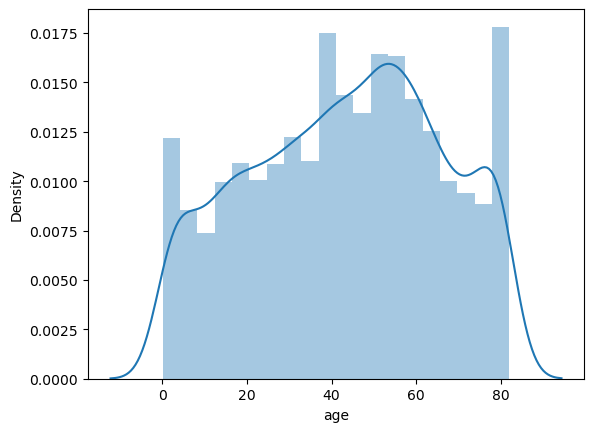

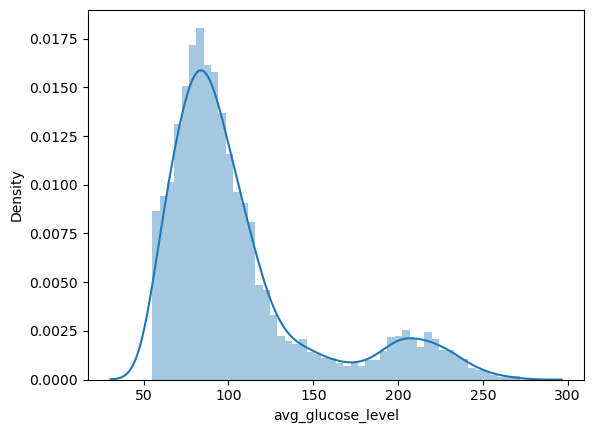

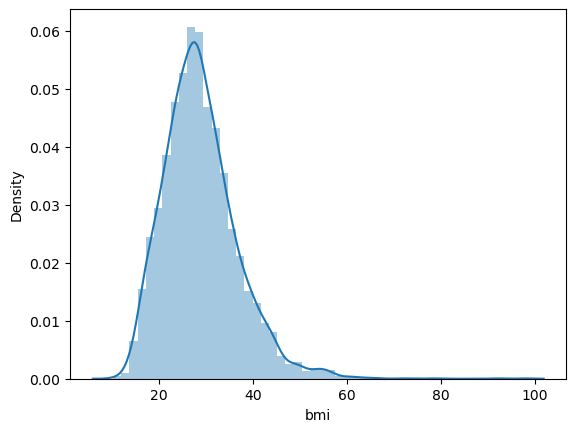

In [17]:
for col in continuous_var:
    plt.figure()
    sns.distplot(df[col],kde=True)

In [18]:
for col in df.select_dtypes('int64').columns:
    if col!="stroke":
        print(f"Distribution en % de la variable {col} : ")
        print(df[col].value_counts(normalize=True)*100)
        print("\n")

Distribution en % de la variable hypertension : 
hypertension
0    90.254403
1     9.745597
Name: proportion, dtype: float64


Distribution en % de la variable heart_disease : 
heart_disease
0    94.598826
1     5.401174
Name: proportion, dtype: float64




##### Variables Qualitatives

In [19]:
for col in Categoricals_var:
    print(f"{col:-<50} {df[col].unique()}")

gender-------------------------------------------- ['Male' 'Female' 'Other']
ever_married-------------------------------------- ['Yes' 'No']
work_type----------------------------------------- ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type------------------------------------ ['Urban' 'Rural']
smoking_status------------------------------------ ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


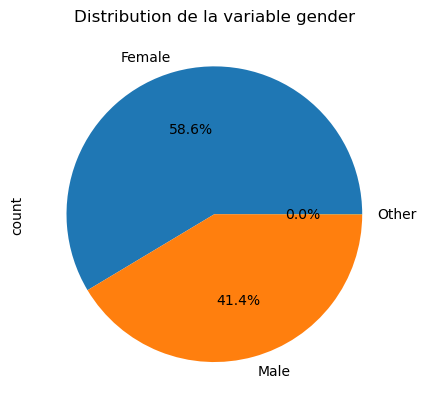

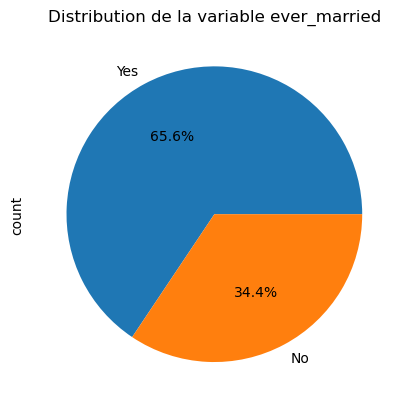

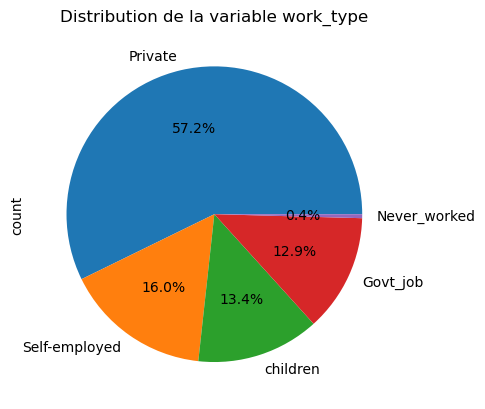

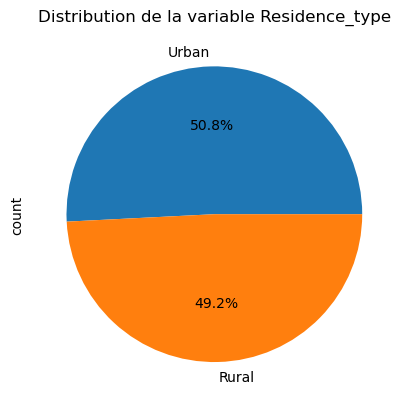

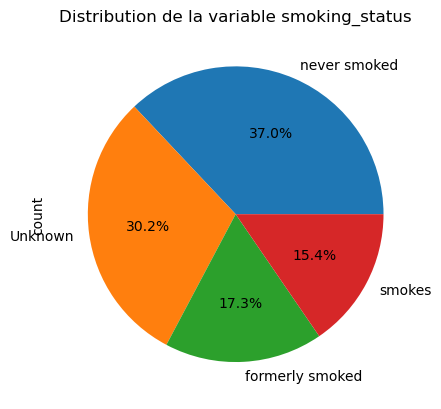

In [21]:
for col in Categoricals_var:
    plt.figure()
    df[col].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(f"Distribution de la variable {col}")
    plt.show()
    print("\n")

#### Relation Target / Variables
##### Création de sous-ensembles positifs et négatifs

In [22]:
positive_df=df[df["stroke"]==1]
negative_df=df[df["stroke"]==0]

positive_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
244,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
245,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1
247,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,NaN,Unknown,1


Pour des questions d'exploration nous allons créer deux groupes des variables:
-    **les variables liées aux mesures corporelles/sanguines** et 
-    **les variables démographiques et comportementales**

In [23]:
# Variables liées aux mesures corporelles/sanguines
biomedical_vars = [
    'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'
]

# Variables démographiques et comportementales
demographic_behavioral_vars = [
    'gender', 'age', 'ever_married', 'work_type', 
    'Residence_type', 'smoking_status'
]

##### Relation entre les variables liées aux mesures corporelles/sanguines et la variable cible(stroke)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\gpres\AppData\Local\Temp\ipykernel_39748\1441723958.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_df[col], label='AVC Positif')
c:\Users\gpres\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

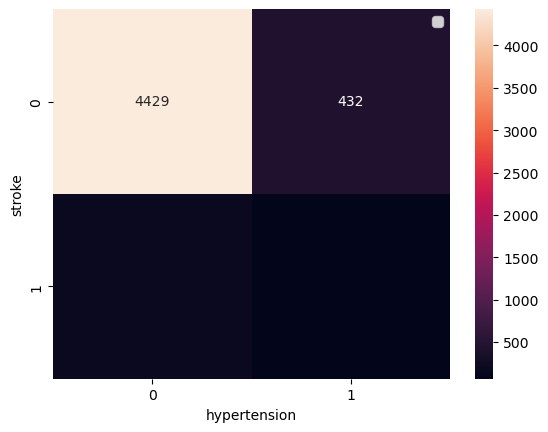

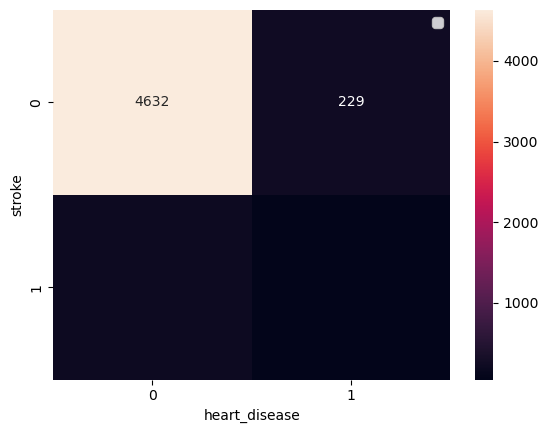

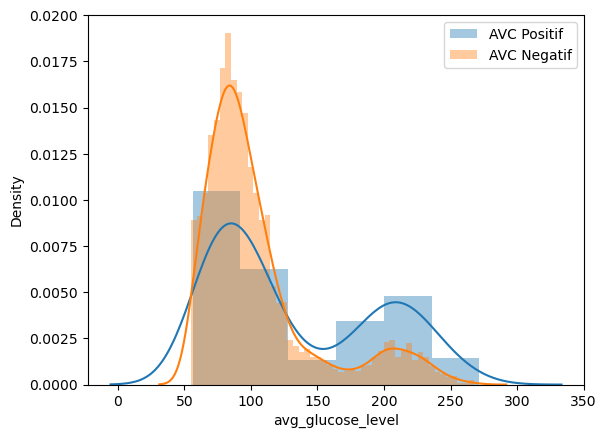

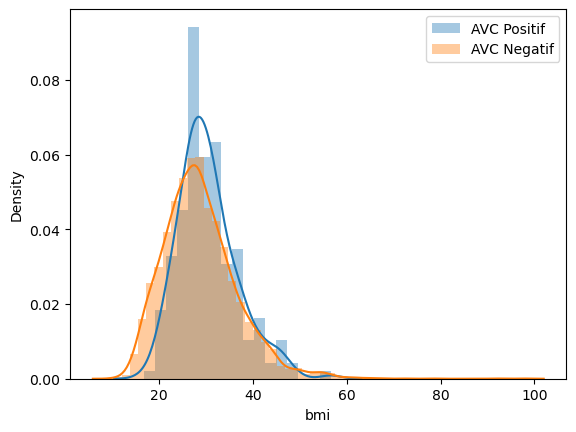

In [24]:
for col in biomedical_vars:
    if df[col].dtype=='float':
        plt.figure()
        sns.distplot(positive_df[col], label='AVC Positif')
        sns.distplot(negative_df[col],label='AVC Negatif')
        plt.legend()
    else:
        plt.figure()
        sns.heatmap(pd.crosstab(df['stroke'],df[col]),annot=True, fmt='d')
        plt.legend()

##### Relation entre les variables démographiques et comportementales et la variable cible(stroke)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\gpres\AppData\Local\Temp\ipykernel_39748\124935086.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_df[col],label='AVC Positif')
c:\Users\gpres\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gpres\AppData\Local\Temp\ipykernel_39748\124935086.py:5: UserWarni

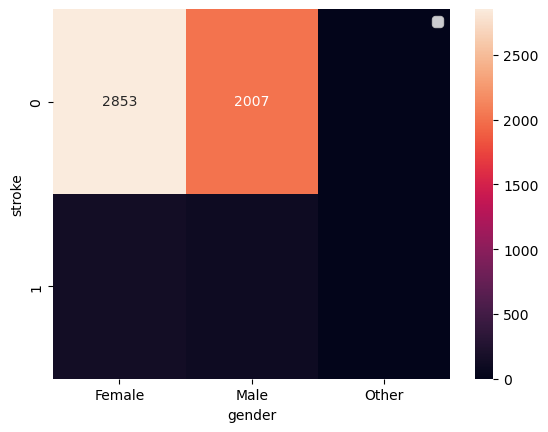

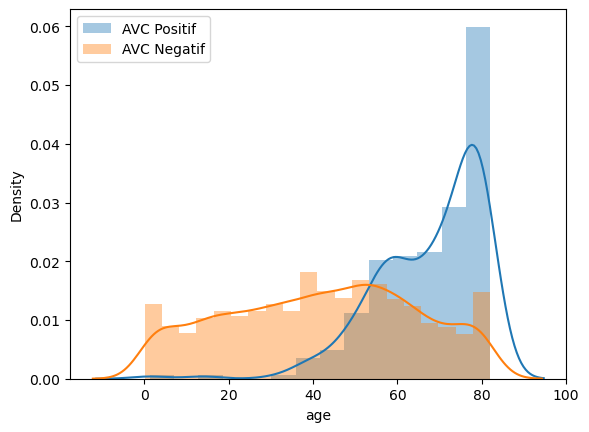

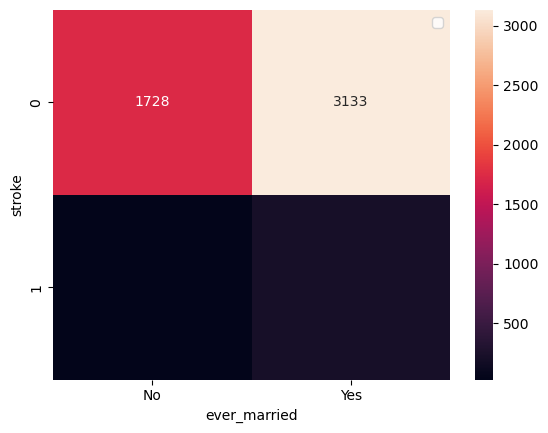

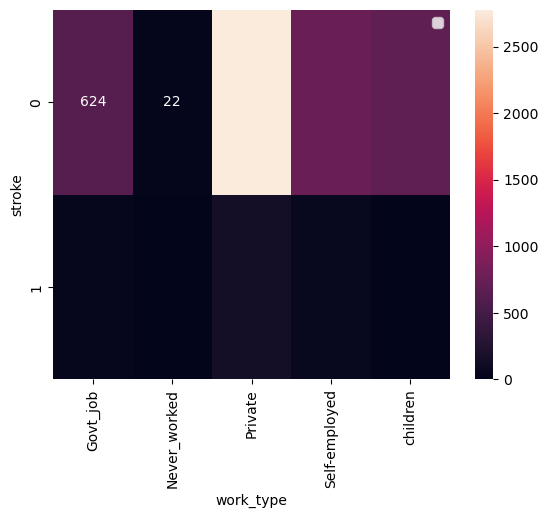

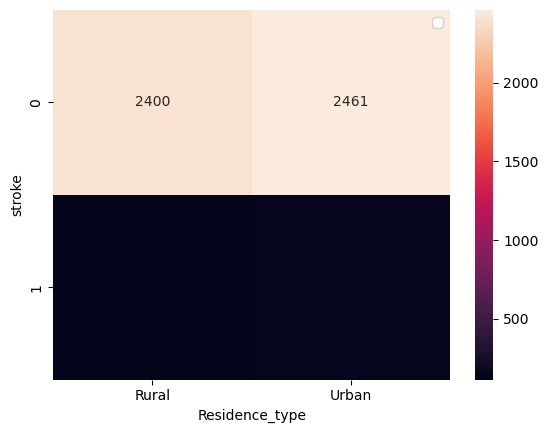

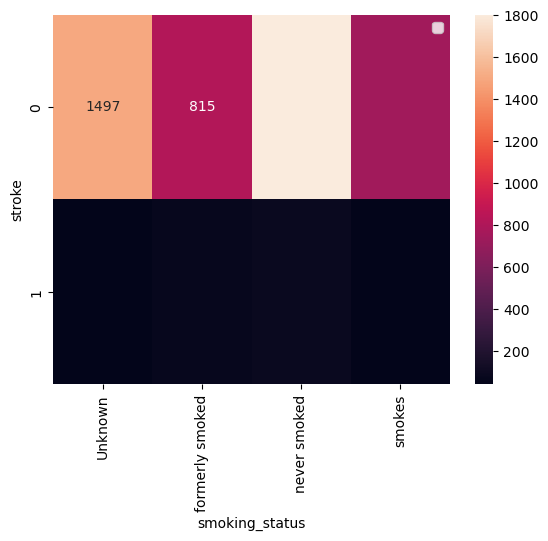

In [25]:
for col in demographic_behavioral_vars:
    if df[col].dtype=='float':
        plt.figure()
        sns.distplot(positive_df[col],label='AVC Positif')
        sns.distplot(negative_df[col],label='AVC Negatif')
        plt.legend()
    else:
        plt.figure()
        sns.heatmap(pd.crosstab(df["stroke"],df[col]),annot=True,fmt='d')
        plt.legend()

### 1-3 Analyse statistique inférentielle


##### 3-1 Test du Chi-carré pour les variables catégorielles

In [26]:
from scipy.stats import chi2_contingency

categorical_vars = ['hypertension', 'heart_disease', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for var in categorical_vars:
    tableau_contingence=pd.crosstab(df[var],df['stroke'])
    chi2,p_value, dof, expected=chi2_contingency(tableau_contingence)

    print(f"Test du Chi-carré pour {var} vs stroke(AVC)")
    print(f"p-value={p_value:.4f}")
    if p_value<0.05:
        print(f"--> Il y a une association significative entre {var} et stroke.\n")
    else:
        print(f"--> Il n'y a pas d'association significative entre {var} et stroke.\n")

Test du Chi-carré pour hypertension vs stroke(AVC)
p-value=0.0000
--> Il y a une association significative entre hypertension et stroke.

Test du Chi-carré pour heart_disease vs stroke(AVC)
p-value=0.0000
--> Il y a une association significative entre heart_disease et stroke.

Test du Chi-carré pour gender vs stroke(AVC)
p-value=0.7895
--> Il n'y a pas d'association significative entre gender et stroke.

Test du Chi-carré pour ever_married vs stroke(AVC)
p-value=0.0000
--> Il y a une association significative entre ever_married et stroke.

Test du Chi-carré pour work_type vs stroke(AVC)
p-value=0.0000
--> Il y a une association significative entre work_type et stroke.

Test du Chi-carré pour Residence_type vs stroke(AVC)
p-value=0.2983
--> Il n'y a pas d'association significative entre Residence_type et stroke.

Test du Chi-carré pour smoking_status vs stroke(AVC)
p-value=0.0000
--> Il y a une association significative entre smoking_status et stroke.



##### 3-2 Test t de Student ou Test U de Mann-Whitney pour les variables continues

Nous avons deux groupes à comparer dans AVC, d'ou le choix du test t de Student ou Test U de Mann-Whitney pour les variables continues dependamment si les variables suivent une distrtibution normale ou pas.

In [27]:
from scipy.stats import mannwhitneyu, ttest_ind

# Variables continues à tester contre 'stroke'
continuous_vars = ['age', 'avg_glucose_level', 'bmi']

for var in continuous_vars:

    group1 = df[df['stroke'] == 0][var]  # Groupe sans AVC
    group2 = df[df['stroke'] == 1][var]  # Groupe avec AVC

    if df[var].skew()<1: # Si la distribution est relativement normale
        stat, p_valeur=ttest_ind(group1,group2, equal_var=False)
        test_type="Test t de Student"
    else:
        stat,p_valeur=mannwhitneyu(group1,group2)
        test_type = "Test U de Mann-Whitney"

    print(f"{test_type} pour {var} vs stroke(AVC)")
    print(f"p-valeur={p_valeur:.4f}")
    if p_valeur < 0.05:
        print(f"--> Il y a une différence significative dans les {var} entre les groupes avec et sans AVC.\n")
    else:
        print(f"--> Il n'y a pas de différence significative dans les {var} entre les groupes avec et sans AVC.\n")

Test t de Student pour age vs stroke(AVC)
p-valeur=0.0000
--> Il y a une différence significative dans les age entre les groupes avec et sans AVC.

Test U de Mann-Whitney pour avg_glucose_level vs stroke(AVC)
p-valeur=0.0000
--> Il y a une différence significative dans les avg_glucose_level entre les groupes avec et sans AVC.

Test U de Mann-Whitney pour bmi vs stroke(AVC)
p-valeur=nan
--> Il n'y a pas de différence significative dans les bmi entre les groupes avec et sans AVC.



#### Conclusion

Les tests statistiques confirment que plusieurs facteurs sont significativement associés au risque d'AVC :

- **Facteurs de Risque Significatifs** :
  - **Hypertension** : Les patients hypertendus ont un risque significativement plus élevé d'AVC.
  - **Maladies Cardiaques (`heart_disease`)** : Les maladies cardiaques augmentent significativement le risque d'AVC.
  - **Statut Matrimonial (`ever_married`)** : Être marié ou avoir été marié est associé à un risque accru d'AVC, probablement lié à l'âge.
  - **Type de Travail (`work_type`)** : Certaines professions, notamment dans le secteur privé et indépendant, montrent un risque plus élevé d'AVC.
  - **Statut de Tabagisme (`smoking_status`)** : Le tabagisme est significativement lié à un risque accru d'AVC.
  - **Âge (`age`)** : L'âge avancé est un facteur de risque majeur pour l'AVC.
  - **Niveau de Glucose Moyen (`avg_glucose_level`)** : Des niveaux élevés de glucose sont associés à un risque accru d'AVC.
  

- **Facteurs Non Significatifs** :
  - **Genre (`gender`)** : Le risque d'AVC est similaire pour les hommes et les femmes.
  - **Type de Résidence (`Residence_type`)** : Le lieu de résidence (rurale vs urbaine) n'affecte pas significativement le risque d'AVC.
  - **Indice de Masse Corporelle (`bmi`)** : il n'y a pas d'association entre `bmi` et `AVC`

Ces résultats suggèrent que les stratégies de prévention des AVC devraient se concentrer sur la gestion de l'hypertension, des maladies cardiaques, du contrôle du glucose, et sur les groupes à risque en fonction de leur âge, statut matrimonial, type de travail et tabagisme.


## 2- Pre-Processing

### 2-1- TrainTest -Nettoyage - Encodage

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

In [29]:
categorical_vars = ['gender','ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease']
numeric_vars = ['age', 'avg_glucose_level', 'bmi']

In [30]:
other_gender_observation=df[df['gender']=='Other']

df=df[df['gender']!='Other']

In [31]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [32]:
for col in Categoricals_var:
    print(f"{col:-<50} {df[col].unique()}")

gender-------------------------------------------- ['Male' 'Female']
ever_married-------------------------------------- ['Yes' 'No']
work_type----------------------------------------- ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type------------------------------------ ['Urban' 'Rural']
smoking_status------------------------------------ ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [81]:
df_trainset, df_testset=train_test_split(df, test_size=0.3,random_state=0)

df_trainset.to_csv("D:/Perso/Detection_AVC/data/train.csv", index=False)
df_testset.to_csv("D:/Perso/Detection_AVC/data/test.csv", index=False)

In [36]:
print(df_trainset["stroke"].value_counts())

stroke
0    3403
1     173
Name: count, dtype: int64


In [37]:
print(df_testset["stroke"].value_counts())

stroke
0    1457
1      76
Name: count, dtype: int64


In [38]:
encoder = LabelEncoder()
scaler = StandardScaler()
numeric_vars = ['age', 'avg_glucose_level','bmi']
categorical_vars = ['gender','ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease']

def encodage(df):
    # Encodage des variables catégorielles
    df = pd.get_dummies(df, columns=categorical_vars, drop_first=False)

    # Convertir les booléens True/False en 0/1
    df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))
    
    # Mise à l'échelle des variables numériques
    df[numeric_vars] = scaler.fit_transform(df[numeric_vars])
    
    return df

In [39]:
#encodage(df)

In [40]:
from sklearn.impute import KNNImputer

imputer=KNNImputer(n_neighbors=5)

def imputation(df):
    #df=df.dropna(axis=0)
    #df=df.fillna(-999)
    df[["bmi"]]=imputer.fit_transform(df[["bmi"]])

    #df["smoking_status"]=df["smoking_status"].replace('Unknown', 'Non Déclaré')

    return df

In [41]:
def preprocessing(df):

    df=imputation(df)
    df=encodage(df)

    X=df.drop("stroke",axis=1)
    y=df["stroke"]

    print(y.value_counts())

    return X,y

In [42]:
#df=imputation(df)

In [43]:
#X_test,y_test=preprocessing(testset)

In [44]:
#y_train

In [45]:
#X_train

### 2-2 Le reechantillonnage avec SMOTE et de la Ponderation des cLasse combinés

In [46]:
#pip install imblearn

In [47]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler

In [48]:
resamplers = {
    'SMOTE': SMOTE(),
    'Random Under Sampling': RandomUnderSampler(),  # Ajoutez les parenthèses ici
    'SMOTE with Tomek Links': SMOTETomek(),
    'Random Over Sampling': RandomOverSampler()
}


### 2-3 Etablissement d'un modele de base

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFECV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from imblearn.pipeline import make_pipeline as make_imb_pipeline

In [50]:
# Modèles à comparer
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Xgboost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

#### 2-2-1 Procedure d'évaluation

In [51]:
from sklearn.metrics import f1_score,confusion_matrix,classification_report,accuracy_score,precision_score,recall_score, roc_auc_score, roc_curve, RocCurveDisplay, log_loss
from sklearn.model_selection import learning_curve, StratifiedKFold

In [52]:
import mlflow
import mlflow.sklearn
import mlflow.xgboost

In [53]:
# Config MLflow (local tracking URI)
mlflow.set_tracking_uri("http://localhost:5000")

In [54]:

"""
# Définir le nom de l'expérience dans MLflow (sera visible dans UI)
mlflow.set_experiment("avc_detection_mlflow_3")

# On ferme tout run restant actif
mlflow.end_run()

# Boucle sur les modèles à tester (Logistic, Random Forest, etc.)
for name, model in models.items():
    # Démarrer un run MLflow (chaque modèle est un run distinct)
    with mlflow.start_run(run_name=name):
        
        # Entraînement du modèle
        model.fit(X_train, y_train)

        # Prédiction des classes (0 ou 1)
        y_pred = model.predict(X_test)

        # Vérifie si le modèle peut retourner des probabilités (ex: LogisticRegression)
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]  # Probabilité d'appartenir à la classe 1
        else:
            y_proba = y_pred  # fallback (moins précis pour les métriques proba)

        # Calcul des métriques
        acc = accuracy_score(y_test, y_pred)         # Précision
        auc = roc_auc_score(y_test, y_proba)         # Zone sous la courbe ROC
        loss = log_loss(y_test, y_proba)            # Log loss (pénalise les mauvaises confiances)
        rappel = recall_score(y_test, y_pred)
        score_f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        
        cm = confusion_matrix (y_test, y_pred)
        plt.figure(figsize=(6,4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion matrix  - {name}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.savefig(f'{name}_cm.png')

        # Log des hyperparamètres et des métriques dans MLflow
        mlflow.log_param("model_name", name)
        mlflow.log_metric("accuracy", acc)
        mlflow.log_metric("roc_auc", auc)
        mlflow.log_metric("log_loss", loss)
        mlflow.log_metric("recall", rappel)
        mlflow.log_metric("f1_score", score_f1)
        mlflow.log_metric("precision", precision)
        mlflow.log_artifacts(f'{name}_cm.png')

        # Exemple d'entrée pour le modèle (facilite le déploiement)
        input_example = pd.DataFrame(X_test[:5], columns=X_test.columns)

        # Signature du modèle (structure des inputs/outputs)
        signature = mlflow.models.infer_signature(X_test, y_pred)

        # Enregistrement du modèle dans MLflow
        mlflow.sklearn.log_model(
            sk_model=model,                # Le modèle entraîné
            artifact_path="model",        # Emplacement dans MLflow
            input_example=input_example,  # Exemple d'entrée
            signature=signature           # Signature pour le déploiement
        )

        # Affiche dans le terminal que le run est fini
        print(f"Fin run : {name}")
        
        """

'\n# Définir le nom de l\'expérience dans MLflow (sera visible dans UI)\nmlflow.set_experiment("avc_detection_mlflow_3")\n\n# On ferme tout run restant actif\nmlflow.end_run()\n\n# Boucle sur les modèles à tester (Logistic, Random Forest, etc.)\nfor name, model in models.items():\n    # Démarrer un run MLflow (chaque modèle est un run distinct)\n    with mlflow.start_run(run_name=name):\n        \n        # Entraînement du modèle\n        model.fit(X_train, y_train)\n\n        # Prédiction des classes (0 ou 1)\n        y_pred = model.predict(X_test)\n\n        # Vérifie si le modèle peut retourner des probabilités (ex: LogisticRegression)\n        if hasattr(model, "predict_proba"):\n            y_proba = model.predict_proba(X_test)[:, 1]  # Probabilité d\'appartenir à la classe 1\n        else:\n            y_proba = y_pred  # fallback (moins précis pour les métriques proba)\n\n        # Calcul des métriques\n        acc = accuracy_score(y_test, y_pred)         # Précision\n        au

In [55]:
def resampling(X_train, y_train):
    resampler = RandomOverSampler()
    X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)
    
    return X_train_resampled, y_train_resampled

## 3- Modelisation

#### 3-1- Choix du modele idéal

In [56]:
from sklearn.svm import SVC
from mlflow.tracking import MlflowClient
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

from sklearn.metrics import (
    roc_curve, auc, precision_recall_curve,
    ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
)
from sklearn.model_selection import learning_curve

In [57]:
# Définir le préprocesseur
preprocessor = make_pipeline(
    PolynomialFeatures(2),
    SelectKBest(f_classif, k=20)
)

In [58]:
# Définition des modèles
RandomForest = make_pipeline(
    preprocessor,
    RandomForestClassifier(random_state=0)
)

LogRegression = make_pipeline(
    preprocessor,
    LogisticRegression() 
)

AdaBoost = make_pipeline(
    preprocessor,
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=50,
        learning_rate=1.0,
        random_state=0
    )
)

SVM = make_pipeline(
    preprocessor,
    StandardScaler(),
    SVC(kernel='poly', degree=3, C=1.0, class_weight='balanced', probability=True, random_state=0)
)

KNN = make_pipeline(
    preprocessor,
    StandardScaler(),
    KNeighborsClassifier()
)

In [59]:
dict_of_models = {
    'RandomForest': RandomForest,
    'AdaBoost': AdaBoost,
    'LogRegression': LogRegression,
    'SVM': SVM,
    'KNN': KNN
}

In [60]:
def plot_and_log_curves(model, X_train, y_train, X_test, y_test, name):

    try:
        y_proba = model.predict_proba(X_test)[:, 1]
    except:
        y_proba = model.decision_function(X_test)
        y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())

    # ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure()
    auc_score = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend()
    roc_path = f"{name}_roc.png"
    plt.savefig(roc_path)
    mlflow.log_artifact(roc_path)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    plt.figure()
    plt.plot(recall, precision)
    plt.xlabel("Recall"); plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve - {name}")
    pr_path = f"{name}_pr.png"
    plt.savefig(pr_path)
    mlflow.log_artifact(pr_path)

    # Learning Curve
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='f1')
    plt.figure()
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Train")
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Validation")
    plt.xlabel("Training examples"); plt.ylabel("F1 score")
    plt.title(f"Learning Curve - {name}")
    plt.legend()
    lc_path = f"{name}_lc.png"
    plt.savefig(lc_path)
    mlflow.log_artifact(lc_path)

    # Matrice de confusion normalisée
    y_pred = model.predict(X_test)
    plt.figure()
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true')
    disp.plot(cmap="Blues", values_format=".2f")
    plt.title(f"Confusion Matrix (normalized) - {name}")
    norm_cm_path = f"{name}_cm_norm.png"
    plt.savefig(norm_cm_path)
    mlflow.log_artifact(norm_cm_path)

In [61]:
"""
# Définition d'une nouvelle expérience MLflow (visible dans l’interface MLflow UI)
import mlflow.models
import mlflow.sklearn


mlflow.set_experiment("avc_detection_mlflow_3_test_models")

# Fermeture de tout run MLflow actif restant
mlflow.end_run()

# Boucle sur chaque modèle à tester (Logistic Regression, RF, etc.)
for name, model in dict_of_models.items():
    with mlflow.start_run(run_name=name): # Démarrage d'un run pour le modèle courant
        model.fit(X_train_resampled, y_train_resampled) # Entraînement du modèle sur les données rééquilibrées
        
        y_pred=model.predict(X_test) # Prédiction des classes
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
        else:
            y_proba = model.decision_function(X_test)
        
        # --- Métriques de performance ---
        acc = accuracy_score(y_test, y_pred) #Taux de bonnes classification
        auc = roc_auc_score(y_test, y_proba) #Performance globale (aire sous la courbe de ROC)
        loss = log_loss(y_test, y_proba) # Erreur logarithmique
        rappel = recall_score(y_test, y_pred) # Rappel (le True positive rate)
        precision = precision_score(y_test, y_pred) #Précision (exactitude des prédictions positives)
        score_f1 = f1_score(y_test, y_pred) #Moyenne harmonique entre precision et rappel
        
        
        # --- Matrice de confusion ---
        cm = confusion_matrix(y_test, y_pred) # Calcule la matrice de confusion
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.title(f'Confusion Matric - {name}')
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.savefig(f'{name}_cm.png')
        
        
        # --- Enregistrement dans MLflow ---
        mlflow.log_param("model_name", name)
        mlflow.log_metrics({
            "Accuracy":acc,
            "roc_auc":auc,
            "log_loss":loss,
            "Precision":precision,
            "Recall":rappel,
            "f1_score":score_f1
        })
        mlflow.log_artifact(f'{name}_cm.png')
        
        # Exemple d’entrée du modèle (utile pour déploiement et test rapide via API)
        signature = pd.DataFrame(X_test[:5], columns=X_test.columns)
        
        # Signature du modèle : structure attendue en entrée/sortie
        signature = mlflow.models.infer_signature(X_test, y_pred)
        
        # Enregistrement du modèle avec sa signature et exemple d’entrée
        mlflow.sklearn.log_model(
            sk_model = model,
            artifact_path = "model",
            input_example = input_example,
            signature = signature
        )
        
        # Courbes et visualisation
        plot_and_log_curves(model, X_train_resampled, y_train_resampled, X_test, y_test, name)
        
        print(f'Fin du run : {name}')
        """

'\n# Définition d\'une nouvelle expérience MLflow (visible dans l’interface MLflow UI)\nimport mlflow.models\nimport mlflow.sklearn\n\n\nmlflow.set_experiment("avc_detection_mlflow_3_test_models")\n\n# Fermeture de tout run MLflow actif restant\nmlflow.end_run()\n\n# Boucle sur chaque modèle à tester (Logistic Regression, RF, etc.)\nfor name, model in dict_of_models.items():\n    with mlflow.start_run(run_name=name): # Démarrage d\'un run pour le modèle courant\n        model.fit(X_train_resampled, y_train_resampled) # Entraînement du modèle sur les données rééquilibrées\n        \n        y_pred=model.predict(X_test) # Prédiction des classes\n        if hasattr(model, "predict_proba"):\n            y_proba = model.predict_proba(X_test)[:, 1]\n        else:\n            y_proba = model.decision_function(X_test)\n        \n        # --- Métriques de performance ---\n        acc = accuracy_score(y_test, y_pred) #Taux de bonnes classification\n        auc = roc_auc_score(y_test, y_proba) 

In [62]:
param_grid=LogRegression.get_params()
print(param_grid)

{'memory': None, 'steps': [('pipeline', Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('selectkbest', SelectKBest(k=20))])), ('logisticregression', LogisticRegression())], 'verbose': False, 'pipeline': Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('selectkbest', SelectKBest(k=20))]), 'logisticregression': LogisticRegression(), 'pipeline__memory': None, 'pipeline__steps': [('polynomialfeatures', PolynomialFeatures()), ('selectkbest', SelectKBest(k=20))], 'pipeline__verbose': False, 'pipeline__polynomialfeatures': PolynomialFeatures(), 'pipeline__selectkbest': SelectKBest(k=20), 'pipeline__polynomialfeatures__degree': 2, 'pipeline__polynomialfeatures__include_bias': True, 'pipeline__polynomialfeatures__interaction_only': False, 'pipeline__polynomialfeatures__order': 'C', 'pipeline__selectkbest__k': 20, 'pipeline__selectkbest__score_func': <function f_classif at 0x000002309B700EA0>, 'logisticregression__C': 1.0, 'logisticreg

In [63]:
param_grid = {
    'poly__degree': [2],
    'select__k': [10, 15, 20],
    'logreg__solver': ['saga'],
    'logreg__max_iter': [500],
    'logreg__C': [0.1, 1, 10],
}

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold

#### 3-2- Entrainement du modele final avec Adaboost optimisé avec GridSerchCV

In [65]:
from     sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [66]:
final_model=Pipeline(steps=[
    ('poly', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('select', SelectKBest(k=20)),
    ('logreg', LogisticRegression())
])
final_model

Pipeline(steps=[('poly', PolynomialFeatures()), ('scaler', StandardScaler()),
                ('select', SelectKBest(k=20)),
                ('logreg', LogisticRegression())])

In [67]:
model_final = RandomizedSearchCV(
    estimator=final_model,  # ton pipeline complet
    param_distributions=param_grid,
    n_iter=10,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1
)

model_final.fit(X_train_resampled, y_train_resampled)

print("Meilleurs hyperparamètres :", model_final.best_params_)
print("Score F1 optimal :", model_final.best_score_)


NameError: name 'X_train_resampled' is not defined

## Entrainement final

In [69]:
import mlflow
import mlflow.models
import mlflow.sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, log_loss, ConfusionMatrixDisplay
)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from mlflow.models.signature import infer_signature
import os

2025/06/22 22:59:42 INFO mlflow.tracking.fluent: Experiment with name 'avc_detection_Entrainement_FInal_CLEAN_5' does not exist. Creating a new experiment.
c:\Users\gpres\anaconda3\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


✅ Fin du run : LogisticRegression_Optimised
🏃 View run LogisticRegression_Optimised at: http://localhost:5000/#/experiments/407916675297022278/runs/d627e37630684f1fb287a7c99ea66808
🧪 View experiment at: http://localhost:5000/#/experiments/407916675297022278


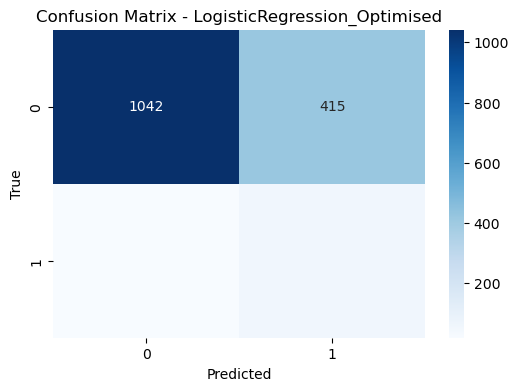

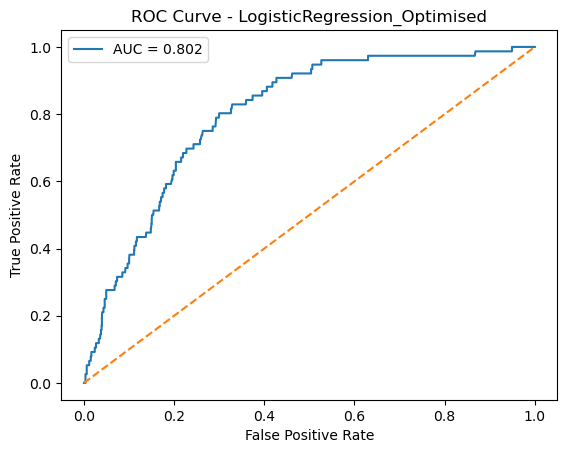

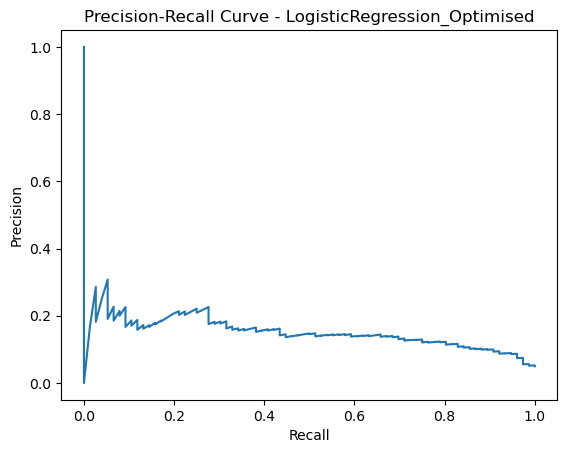

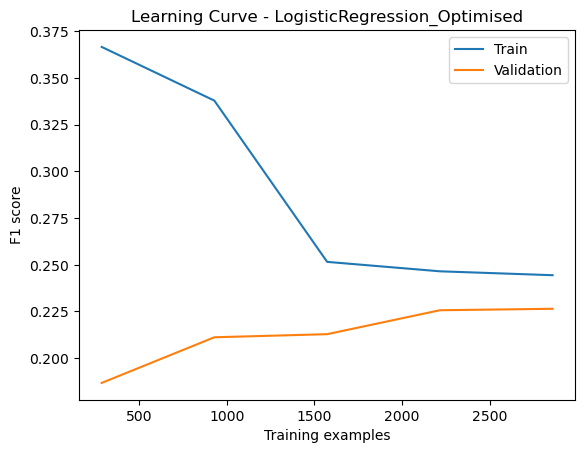

<Figure size 640x480 with 0 Axes>

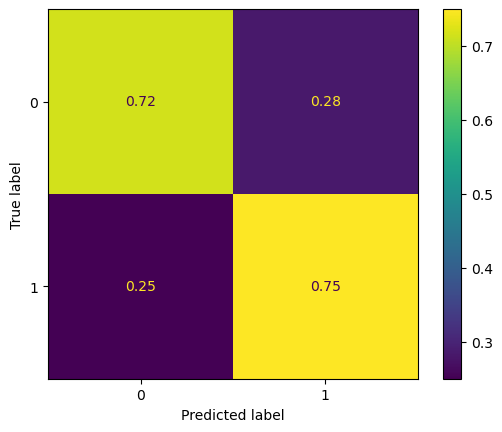

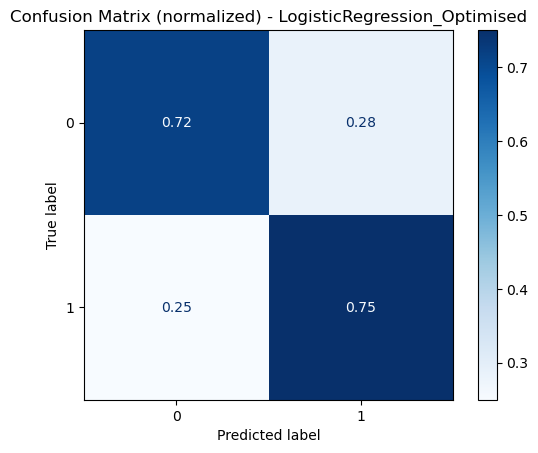

In [70]:
# === Variables ===
numeric_vars = ["age", "avg_glucose_level", "bmi"]
categorical_vars = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease']

# === Séparation features / target ===
X_train = df_trainset.drop("stroke", axis=1)
y_train = df_trainset["stroke"]
X_test = df_testset.drop("stroke", axis=1)
y_test = df_testset["stroke"]

# === Prétraitement ===
numeric_pipeline = Pipeline([
    ("imputer", KNNImputer(n_neighbors=5)),
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, numeric_vars),
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_vars)
])

# === Pipeline complet avec preprocessing + modèle ===
optimised_model = ImbPipeline([
    ("preprocessing", preprocessor),
    ("resample", SMOTE(random_state=42)),
    ("poly", PolynomialFeatures(degree=2)),
    ("var_filter", VarianceThreshold(threshold=0.0)),
    ("select", SelectKBest(score_func=f_classif, k=30)),
    ("logreg", LogisticRegression(solver="saga", max_iter=500, C=1))
])

# === MLflow logging ===
mlflow.set_experiment("avc_detection_Entrainement_FInal_CLEAN_5")
mlflow.end_run()

name = "LogisticRegression_Optimised"
input_example = X_test[:1].to_dict(orient="records")[0]

with mlflow.start_run(run_name=name):
    optimised_model.fit(X_train, y_train)

    y_pred = optimised_model.predict(X_test)
    y_proba = optimised_model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    loss = log_loss(y_test, y_proba)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    score_f1 = f1_score(y_test, y_pred)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel("Predicted")
    plt.ylabel("True")
    cm_path = f'{name}_cm.png'
    plt.savefig(cm_path)

    mlflow.log_param("model_name", name)
    mlflow.log_metrics({
        "Accuracy": acc,
        "roc_auc": auc,
        "log_loss": loss,
        "Precision": precision,
        "Recall": recall,
        "f1_score": score_f1
    })
    mlflow.log_artifact(cm_path)

    signature = infer_signature(X_test, y_pred)

    mlflow.sklearn.log_model(
        sk_model=optimised_model,
        artifact_path="model",
        input_example=input_example,
        signature=signature
    )

    os.remove(cm_path)

    # Log courbes ROC et PR si tu as une fonction déjà prête
    plot_and_log_curves(optimised_model, X_train, y_train, X_test, y_test, name)

    print(f'✅ Fin du run : {name}')

In [71]:
# Recherche d'une probabilité optimale
thresholds = np.linspace(0.05, 0.9, num=10)
resultats = []

for t in thresholds:
    preds = (y_proba >= t).astype(int)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    resultats.append((t, precision, recall, f1))
    
for t, p, r, f in resultats:
    print(f"Seuil: {t:.2f} | Précision: {p:.3f} | Rappel: {r:.3f} | F1-score: {f:.3f}")

Seuil: 0.05 | Précision: 0.080 | Rappel: 0.961 | F1-score: 0.148
Seuil: 0.14 | Précision: 0.091 | Rappel: 0.921 | F1-score: 0.165
Seuil: 0.24 | Précision: 0.099 | Rappel: 0.895 | F1-score: 0.178
Seuil: 0.33 | Précision: 0.105 | Rappel: 0.855 | F1-score: 0.187
Seuil: 0.43 | Précision: 0.116 | Rappel: 0.829 | F1-score: 0.204
Seuil: 0.52 | Précision: 0.126 | Rappel: 0.750 | F1-score: 0.216
Seuil: 0.62 | Précision: 0.140 | Rappel: 0.658 | F1-score: 0.230
Seuil: 0.71 | Précision: 0.151 | Rappel: 0.434 | F1-score: 0.224
Seuil: 0.81 | Précision: 0.186 | Rappel: 0.276 | F1-score: 0.222
Seuil: 0.90 | Précision: 0.250 | Rappel: 0.026 | F1-score: 0.048


In [72]:
import mlflow.pyfunc

In [73]:
True_stroke=df_testset[df_testset["stroke"]==1]

In [74]:
True_stroke.iloc[3]

gender                          Male
age                             76.0
hypertension                       1
heart_disease                      0
ever_married                     Yes
work_type              Self-employed
Residence_type                 Rural
avg_glucose_level             194.37
bmi                             27.0
smoking_status       formerly smoked
stroke                             1
Name: 138, dtype: object

In [76]:
# Chargement du modèle MLflow
logged_model = 'runs:/d627e37630684f1fb287a7c99ea66808/model'
#loaded_model = mlflow.pyfunc.load_model(logged_model)
loaded_model = mlflow.sklearn.load_model(logged_model)

# Exemple de données brutes
data = [{
    "gender": "Male",
    "age": 76.0,
    "hypertension": 1,
    "heart_disease": 0,
    "ever_married": "Yes",
    "work_type": "Self-employed",
    "Residence_type": "Rural",
    "avg_glucose_level": 194.37,
    "bmi": 27.0,
    "smoking_status": "formerly smoked"
}]

# Créer un DataFrame à partir des données
df_input = pd.DataFrame(data)

# Prédiction
prediction = loaded_model.predict(df_input)
print("✅ Prédiction (stroke) :", prediction)

# Probabilité (si disponible)
try:
    proba = loaded_model.predict_proba(df_input)[:, 1]
    print("📊 Probabilité d’AVC :", proba)
except Exception:
    print("⚠️ Probabilité non disponible pour ce modèle")


✅ Prédiction (stroke) : [1]
📊 Probabilité d’AVC : [0.77014918]


## Créer un jeu de test médical réaliste

In [77]:
#prediction brute
df_testset["proba"] = loaded_model.predict_proba(df_testset)[:, 1]
df_testset["prediction"] = (df_testset["proba"] >=0.40).astype(int)

In [78]:
faux_negatifs = df_testset[(df_testset["stroke"] == 1) & (df_testset["prediction"] == 0)]
taux_erreur = (len(faux_negatifs)/(len(df_testset[df_testset["stroke"]==1])))*100
print(f"Taux de faux négatifs : {taux_erreur}")


Taux de faux négatifs : 17.105263157894736
